In [20]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_movie=pd.read_csv('Data/movies.dat', sep = '::', names = ['MovieID','MovieName','Genre'], engine='python')
df_movie.head()

,MovieID,MovieName,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# check for any missing values
df_movie.isna().sum()

MovieID      0
MovieName    0
Genre        0
dtype: int64

In [4]:
df_rating = pd.read_csv("Data/ratings.dat",sep='::',names =['UserID','MovieID','Ratings','TimeStamp'] ,engine='python')
df_rating.head()

,UserID,MovieID,Ratings,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
# check for any missing values
df_rating.isna().sum()

UserID       0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

In [6]:
df_user = pd.read_csv("Data/users.dat",sep='::', names=['UserID','Gender','Age','Occupation','Zip-code'],engine='python')
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
# check for any missing values
df_user.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

### Merge all the datasets in one Dataframe

In [8]:
# merge all 3 datasets into MasterData
Master_Data = df_movie.merge(df_rating).merge(df_user)[['MovieID','MovieName','UserID','Age','Gender','Occupation','Ratings','Genre']]
Master_Data.head(10)

,MovieID,MovieName,UserID,Age,Gender,Occupation,Ratings,Genre
0,1,Toy Story (1995),1,1,F,10,5,Animation|Children's|Comedy
1,48,Pocahontas (1995),1,1,F,10,5,Animation|Children's|Musical|Romance
2,150,Apollo 13 (1995),1,1,F,10,5,Drama
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4,Action|Adventure|Fantasy|Sci-Fi
4,527,Schindler's List (1993),1,1,F,10,5,Drama|War
5,531,"Secret Garden, The (1993)",1,1,F,10,4,Children's|Drama
6,588,Aladdin (1992),1,1,F,10,4,Animation|Children's|Comedy|Musical
7,594,Snow White and the Seven Dwarfs (1937),1,1,F,10,4,Animation|Children's|Musical
8,595,Beauty and the Beast (1991),1,1,F,10,5,Animation|Children's|Musical
9,608,Fargo (1996),1,1,F,10,4,Crime|Drama|Thriller


### Visualizations

In [9]:
# function to show values on bars
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2 
                _y = p.get_y() + p.get_height() + float(space)
                value = round(p.get_height(),2)
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = round(p.get_width(),2)
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

### Age Distribution

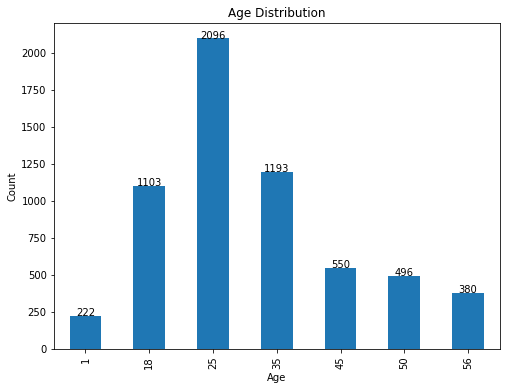

In [10]:
# plot for age distribution
age_distribution_plot = df_user.Age.value_counts().sort_index().plot.bar(title='Age Distribution',figsize=(8,6))
plt.xlabel('Age')
plt.ylabel('Count')
show_values_on_bars(age_distribution_plot,'v')

- As we can see the age is distributed normally which should be the case
- users between age 25-34 watch movies the most
- age groups between 18-44 like to watch movies

#### User Ratings on Movie - Toy Story

Average Rating for the Movie Toy Story =  4.15


Text(0, 0.5, 'Count')

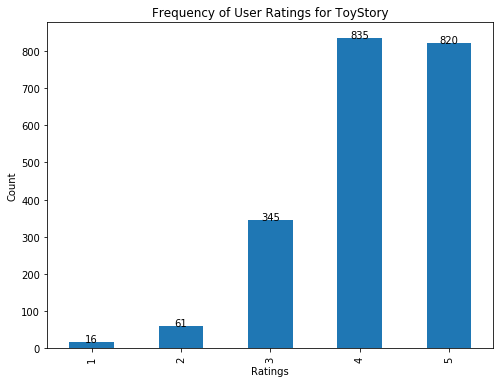

In [11]:
df_toystory = Master_Data[Master_Data.MovieName == 'Toy Story (1995)']
print('Average Rating for the Movie Toy Story = ',round(df_toystory.Ratings.mean(),2))
toystory_plot = df_toystory.Ratings.value_counts().sort_index().plot.bar(title='Frequency of User Ratings for ToyStory',figsize=(8,6))
show_values_on_bars(toystory_plot,'v',0.3)
plt.xlabel('Ratings')
plt.ylabel('Count')

- only few users have given ratings 1 and 2
- most of the ratings given are 4 and 5 
- quite a few movie get ratings 3
- This means Toy-Story was liked by more than 90% of the people who watched it.

#### Top 25 movies by viewership rating

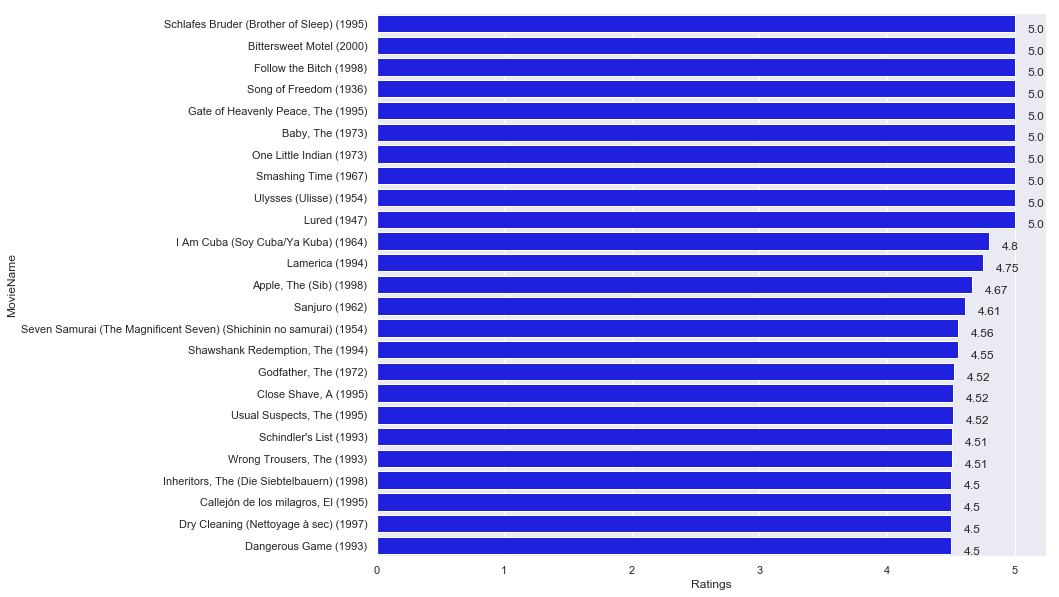

In [12]:
sns.set(rc={'figure.figsize':(12,10)})
top_25_movies_by_ratings = Master_Data.groupby('MovieID').mean().reset_index().merge(df_movie)[['MovieID','MovieName','Ratings']].sort_values('Ratings',ascending=False).iloc[:25]
splot = sns.barplot(y='MovieName',x='Ratings',data=top_25_movies_by_ratings,color='Blue')
show_values_on_bars(splot,'h',0.1)

- Top 10 movies have perfect rating 5 because they are watched less number of times(mostly only once)
- Top 25 movies are mostly between 1990-2000
- All of the movies have average rating of 4.5

#### Ratings for all the movies reviewed by User with id = 2696

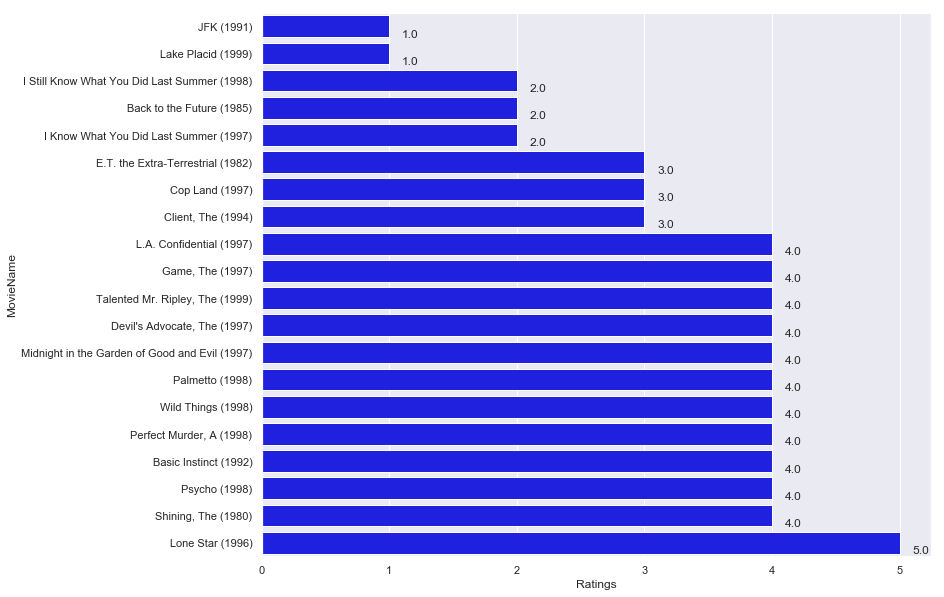

In [13]:
user_2696_ratings = Master_Data[Master_Data.UserID == 2696][['MovieName','Ratings']].sort_values(by='Ratings').reset_index(drop=True)
splot = sns.barplot(y='MovieName',x='Ratings',data=user_2696_ratings,color='Blue')
show_values_on_bars(splot,'h',0.1)

- According to the ratings user 2696 likes horror and scary movies

## Feature Engineering

### Find out all the unique genres

In [14]:
from functools import reduce
# convert the Genre to list by splitting and then use reduce to concat all the lists to form 1D list and then
# convert to set for getting the unique values
set(reduce(lambda x,y :x+y ,df_movie.Genre.str.split('|')))

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

### Create a separate column for each genre category with a one-hot encoding ( 1 and 0)

In [15]:
# use str.get_dummies (one hot encodes using splitter '|') to get one hot encoding and join it to the original df_movie
Master_Data=Master_Data.drop('Genre', 1).join(Master_Data.Genre.str.get_dummies().add_prefix('Genre_'))
Master_Data

,MovieID,MovieName,UserID,Age,Gender,Occupation,Ratings,Genre_Action,Genre_Adventure,Genre_Animation,...,Genre_Fantasy,Genre_Film-Noir,Genre_Horror,Genre_Musical,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_War,Genre_Western
0,1,Toy Story (1995),1,1,F,10,5,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),1,1,F,10,5,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),1,1,F,10,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4,1,1,0,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),1,1,F,10,5,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,531,"Secret Garden, The (1993)",1,1,F,10,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,588,Aladdin (1992),1,1,F,10,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7,594,Snow White and the Seven Dwarfs (1937),1,1,F,10,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8,595,Beauty and the Beast (1991),1,1,F,10,5,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9,608,Fargo (1996),1,1,F,10,4,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Feature Selection

In [ ]:
# drop movie name for prediction as it is same as movieID
Master_Data.drop('MovieName',inplace=True,axis = 1)

# COnvert Gender to numerical form
Master_Data.Gender = Master_Data.Gender.replace(['F','M'],[1,0])

In [24]:
# Split data into features and target
x_cols = list(Master_Data.columns.values)
x_cols.remove('Ratings')
X = Master_Data[x_cols]
y = Master_Data['Ratings']

In [25]:
# two models with feature_importances_ or coef_ attributes
model_dict = {'RandomForestClassifier':RandomForestClassifier(),
              'ExtraTreeClassifier':ExtraTreeClassifier(),              
               }
importance_df = pd.DataFrame(columns=[k for k in model_dict.keys()],index=X.columns)

In [26]:
for clf_name,classifier in model_dict.items():
    classifier.fit(X, y)
    try:
        importance_df[clf_name] = classifier.feature_importances_
    except:
        if len(classifier.coef_) == 1:
            importance_df[clf_name] = classifier.coef_[0]
        else:
            importance_df[clf_name] = classifier.coef_

In [27]:
importance_df

,RandomForestClassifier,ExtraTreeClassifier
MovieID,0.240591,0.285185
UserID,0.510412,0.481269
Age,0.052535,0.058372
Gender,0.010749,0.006958
Occupation,0.145928,0.136010
Genre_Action,0.003571,0.003447
Genre_Adventure,0.002722,0.002719
Genre_Animation,0.001079,0.001247
Genre_Children's,0.002135,0.001927
Genre_Comedy,0.003661,0.001350


- As you can see Movie ID and UserID shows most importance as there are multiple ratings per movie and per user
- ideally we used replace the movieID with the information about the movie like cast, theme, story of the movie and convert it to NLP problem
- also we used use the attributed of the user such as his hobbies, likings, interests instead of just age gender and occupation
- age and gender does not show importance in modelling but occupation does show some importance
- Genre of the movie also does not show any importance 
- We can definetly use more models or different techniques like Recurrsive FEature Elemination etc for feature selection

In [34]:
# use logistic regression, SVM and Random Forest Classifiers for prediction 
model_dict = {'LogisticRegression':LogisticRegression(),
              'RandomForestClassifier':RandomForestClassifier(),
              'SVC':SVC(),              
               }

In [ ]:
# train test split with 70-30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=112)

# 3 fold cross validation for evaluation
for clf_name,classifier in model_dict.items():
    classifier.fit(X_train, y_train)
    print(clf_name,' - ', classifier.score(X_test,y_test))

LogisticRegression  -  0.34940995724231244
RandomForestClassifier  -  0.33825230035025977


##### Our models performace is poor due to 
- the lack of good features
- lack of equally distributed data for each predictive value (very less datat for ratings 1 and 2 while very large data with 4 and 5)
- this causes over fitting of data